# Data Gathering - Poll data

In [3]:
import gepd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
import seaborn as sns
import matplotlib.pyplot as plt

## Getting Data

In [4]:
data = gepd.gepd()

In [5]:
df = data.get_surveys()

In [128]:
data.get_parliaments()

{'0': {'Shortcut': 'Bundestag',
  'Name': 'Bundestag',
  'Election': 'Bundestagswahl'},
 '9': {'Shortcut': 'Niedersachsen',
  'Name': 'Niedersächsischer Landtag',
  'Election': 'Landtagswahl in Niedersachsen'},
 '8': {'Shortcut': 'Mecklenburg-Vorpommern',
  'Name': 'Landtag von Mecklenburg-Vorpommern',
  'Election': 'Landtagswahl in Mecklenburg-Vorpommern'},
 '3': {'Shortcut': 'Berlin',
  'Name': 'Berliner Abgeordnetenhaus',
  'Election': 'Abgeordnetenhauswahl in Berlin'},
 '13': {'Shortcut': 'Sachsen',
  'Name': 'Sächsischer Landtag',
  'Election': 'Landtagswahl in Sachsen'},
 '2': {'Shortcut': 'Bayern',
  'Name': 'Bayerischer Landtag',
  'Election': 'Landtagswahl in Bayern'},
 '16': {'Shortcut': 'Thüringen',
  'Name': 'Thüringischer Landtag',
  'Election': 'Landtagswahl in Thüringen'},
 '12': {'Shortcut': 'Saarland',
  'Name': 'Saarländischer Landtag',
  'Election': 'Landtagswahl im Saarland'},
 '11': {'Shortcut': 'Rheinland-Pfalz',
  'Name': 'Landtag von Rheinland-Pfalz',
  'Electio

In [6]:
df

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,1,2,4,3,7,0,5,8,101,102,11,13,10,14,9,6,16,15
0,2021-08-28,1038,0,9,6,2021-08-18,2021-08-26,26.0,24.0,17.0,10.5,10.5,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-28,1247,0,5,3,2021-08-23,2021-08-27,21.0,24.0,17.0,13.0,11.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-27,1689,0,13,43,2021-08-20,2021-08-24,22.0,24.0,16.0,13.0,11.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-27,1300,0,6,5,2021-08-24,2021-08-26,22.0,22.0,20.0,10.0,11.0,6.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-26,1002,9,24,97,2021-08-16,2021-08-26,NaN,39.0,17.0,11.0,5.0,4.0,4.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2017-01-25,2504,0,2,2,2017-01-16,2017-01-20,37.0,21.0,10.0,6.0,12.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1747,2017-01-24,5028,0,16,14,2017-01-12,2017-01-23,37.1,20.4,9.3,6.2,13.2,4.3,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,2017-01-24,1992,0,5,4,2017-01-20,2017-01-23,32.5,21.0,8.5,7.5,14.5,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749,2017-01-22,2805,0,3,3,2017-01-12,2017-01-18,36.0,21.0,9.0,6.0,12.0,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Only federal election

In [134]:
df = df.loc[df["Parliament_ID"] == "0"]

## Transforming collum names

In [135]:
parties_dict = data.get_parties()

In [136]:
def parties_dict_short_function(parties_dict):
    dct = {}
    for key, value in parties_dict.items():
        dct[key] = value["Shortcut"]
    return dct

In [137]:
parties_dict_short  = parties_dict_short_function(parties_dict)


In [138]:
parties_dict_short

{'7': 'AfD',
 '11': 'BP',
 '14': 'BVB/FW',
 '4': 'Grüne',
 '16': 'BIW',
 '1': 'CDU/CSU',
 '101': 'CDU',
 '102': 'CSU',
 '5': 'Linke',
 '13': 'Die PARTEI',
 '3': 'FDP',
 '8': 'Freie Wähler',
 '9': 'NPD',
 '15': 'Tierschutzpartei',
 '6': 'Piraten',
 '2': 'SPD',
 '10': 'SSW',
 '0': 'Sonstige'}

In [139]:
df = df.rename(columns=parties_dict_short)

## Date to 120 days

In [140]:
df["Date"] =  pd.to_datetime(df["Date"], format= "Y-M-D")

In [141]:
start_date = "2021-05-24"
end_date = "2021-8-28"

In [142]:
df_dated = df.loc[(df['Date'] > start_date) & (df['Date'] <= end_date)]

## Eliminating useless collumns

In [143]:
df_dated = df_dated.fillna(0)

In [144]:
df_dated["CDU/CSU"] = df_dated["CDU/CSU"] + df_dated["CDU"] + df_dated["CSU"]

In [145]:
other_parties = ["Sonstige", "Freie Wähler", "BP","Die PARTEI", "SSW", "BVB/FW", "NPD", "Piraten",\
                    "BIW", "Tierschutzpartei"]

In [146]:
df_dated = df_dated.drop(columns = ["CDU", "CSU"])

In [147]:
df_dated["other"] =  df_dated[other_parties].sum(axis=1)

In [148]:
df_dated

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,CDU/CSU,SPD,Grüne,FDP,AfD,Sonstige,Linke,Freie Wähler,BP,Die PARTEI,SSW,BVB/FW,NPD,Piraten,BIW,Tierschutzpartei,other
0,2021-08-28,1038,0,9,6,2021-08-18,2021-08-26,26.0,24.0,17.0,10.5,10.5,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,2021-08-28,1247,0,5,3,2021-08-23,2021-08-27,21.0,24.0,17.0,13.0,11.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,2021-08-27,1689,0,13,43,2021-08-20,2021-08-24,22.0,24.0,16.0,13.0,11.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,2021-08-27,1300,0,6,5,2021-08-24,2021-08-26,22.0,22.0,20.0,10.0,11.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
5,2021-08-26,1919,0,3,64,2021-08-18,2021-08-24,23.0,23.0,18.0,12.0,11.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
8,2021-08-25,1096,0,7,41,2021-08-12,2021-08-18,23.0,21.0,17.0,13.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
10,2021-08-25,10054,0,16,14,2021-08-18,2021-08-25,22.0,22.0,18.0,12.0,12.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
12,2021-08-24,2504,0,2,63,2021-08-17,2021-08-23,22.0,23.0,18.0,12.0,10.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
13,2021-08-23,2119,0,5,4,2021-08-20,2021-08-23,23.0,23.0,17.0,13.0,11.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
14,2021-08-22,1352,0,5,3,2021-08-16,2021-08-20,22.0,22.0,17.0,13.0,12.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [149]:
df_dated = df_dated.drop( columns = other_parties ).drop( columns = ["Parliament_ID","Institute_ID", "Tasker_ID"] )


### Removing repeated dates with mean

In [150]:
df_dated_grouped = df_dated.groupby(by = "Date").mean()

In [151]:
pd.date_range(start = start_date, end = end_date ).difference(df_dated.Date).value_counts().sum()

33

In [152]:
## we have 37 missing values

### Adding missing dates

In [153]:
correct_dates = pd.DataFrame(pd.date_range(start = start_date, end = end_date ))

In [154]:
correct_dates

,0
0,2021-05-24
1,2021-05-25
2,2021-05-26
3,2021-05-27
4,2021-05-28
5,2021-05-29
6,2021-05-30
7,2021-05-31
8,2021-06-01
9,2021-06-02


In [155]:
df_dated = correct_dates.merge(df_dated_grouped, how = "left", left_on= 0 , right_on = ["Date" ])

In [156]:
df_dated = df_dated.set_index([0])

In [157]:
df_dated = df_dated.where(df_dated.notnull() , other=(df_dated.fillna(method='ffill')\
                                                           + df_dated.fillna(method='bfill'))/2)


In [158]:
df_dated.isna().value_counts()

Surveyed_Persons  CDU/CSU  SPD    Grüne  FDP    AfD    Linke  other
False             False    False  False  False  False  False  False    95
True              True     True   True   True   True   True   True      2
dtype: int64

### Removing first two and last two values

In [159]:
df_final =  df_dated.iloc[2:-2].round(2)


In [160]:
df_final

,Surveyed_Persons,CDU/CSU,SPD,Grüne,FDP,AfD,Linke,other
0,,,,,,,,
2021-05-26,4716.00,25.67,15.33,23.33,12.83,10.50,6.17,6.17
2021-05-27,1705.00,26.00,15.00,22.00,12.00,11.00,7.00,7.00
2021-05-28,1718.00,25.00,14.00,23.00,11.50,12.50,8.00,6.00
2021-05-29,1301.00,25.00,16.00,22.00,13.00,12.00,7.00,5.00
2021-05-30,1670.50,25.25,15.75,21.75,13.25,11.50,6.75,5.75
2021-05-31,1670.50,25.25,15.75,21.75,13.25,11.50,6.75,5.75
2021-06-01,2040.00,25.50,15.50,21.50,13.50,11.00,6.50,6.50
2021-06-02,6257.50,27.00,15.00,23.00,13.00,9.50,6.00,6.50
2021-06-03,3838.25,25.50,15.50,22.50,13.00,10.25,6.50,6.75


In [161]:
df_final.index.name = 'Date'

In [162]:
df_final["Surveyed_Persons"] = df_final["Surveyed_Persons"].astype(int)

In [163]:
df_final =df_final.round(2)

In [176]:
df_final.reset_index()

,Date,Surveyed_Persons,CDU/CSU,SPD,Grüne,FDP,AfD,Linke,other
0,2021-05-26,4716,25.67,15.33,23.33,12.83,10.50,6.17,6.17
1,2021-05-27,1705,26.00,15.00,22.00,12.00,11.00,7.00,7.00
2,2021-05-28,1718,25.00,14.00,23.00,11.50,12.50,8.00,6.00
3,2021-05-29,1301,25.00,16.00,22.00,13.00,12.00,7.00,5.00
4,2021-05-30,1670,25.25,15.75,21.75,13.25,11.50,6.75,5.75
5,2021-05-31,1670,25.25,15.75,21.75,13.25,11.50,6.75,5.75
6,2021-06-01,2040,25.50,15.50,21.50,13.50,11.00,6.50,6.50
7,2021-06-02,6257,27.00,15.00,23.00,13.00,9.50,6.00,6.50
8,2021-06-03,3838,25.50,15.50,22.50,13.00,10.25,6.50,6.75
9,2021-06-04,3838,25.50,15.50,22.50,13.00,10.25,6.50,6.75


In [167]:
df_final.to_csv("polls_data_2021_v4.csv")

### Plotting

In [171]:
parties = ["CDU/CSU", "SPD", "Grüne", "FDP", "AfD","Linke", "other" ]

<AxesSubplot:xlabel='Date'>

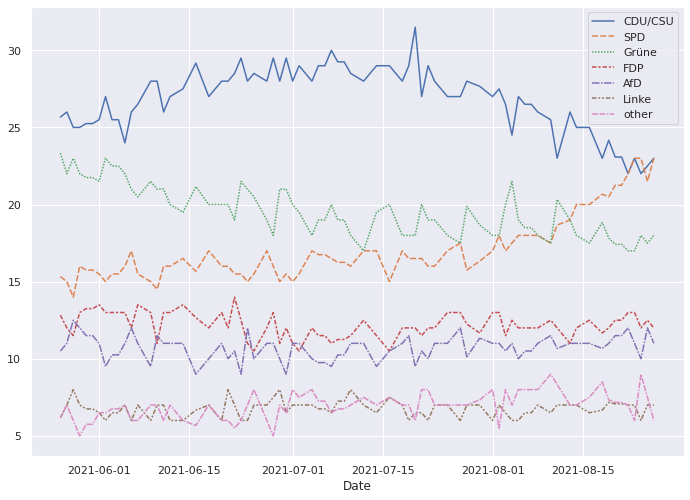

In [172]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot( data = df_final[parties])


In [170]:
pd.read_csv("../raw_data/sample_twitter_api.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/sample_twitter_api.csv'